In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [2]:
df= pd.read_csv(r"C:\Users\91758\Downloads\Predict Upvotes\train_NIR5Yl1.csv")

In [3]:
df.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330045 entries, 0 to 330044
Data columns (total 7 columns):
ID            330045 non-null int64
Tag           330045 non-null object
Reputation    330045 non-null float64
Answers       330045 non-null float64
Username      330045 non-null int64
Views         330045 non-null float64
Upvotes       330045 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 17.6+ MB


In [5]:
df.Username.value_counts()

4118      797
17878     608
45704     483
23223     413
6697      408
62142     408
94185     391
59362     355
61217     337
41953     328
12074     326
82170     321
93544     320
58117     310
67129     297
21641     292
22010     269
42835     261
78813     248
80714     248
88986     241
58656     233
71408     231
23032     222
72364     214
2177      209
45253     206
14828     202
93065     201
35130     200
         ... 
146384      1
140243      1
138196      1
11154       1
50063       1
56204       1
162520      1
84670       1
82623       1
168645      1
166598      1
164551      1
146128      1
144081      1
142034      1
139987      1
131799      1
160473      1
58251       1
152285      1
148191      1
45953       1
41859       1
37765       1
35718       1
33671       1
64392       1
62345       1
60298       1
0           1
Name: Username, Length: 141802, dtype: int64

In [6]:
df.Tag.value_counts()

c    72458
j    72232
p    43407
i    32400
a    31695
s    23323
h    20564
o    14546
r    12442
x     6978
Name: Tag, dtype: int64

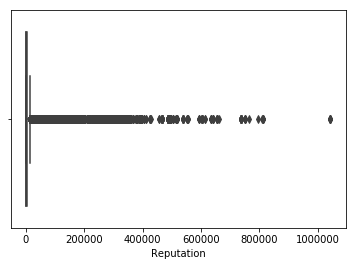

In [7]:
sns.boxplot(df['Reputation'])

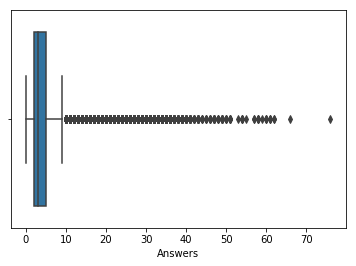

In [8]:
sns.boxplot(df['Answers'])

In [9]:
le= LabelEncoder()

In [10]:
df['Tag']= le.fit_transform(df['Tag'])

In [11]:
df['Username']= le.fit_transform(df['Username'])

In [12]:
df.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,0,3942.0,2.0,126204,7855.0,42.0
1,327662,0,26046.0,12.0,17767,55801.0,1175.0
2,468453,1,1358.0,4.0,45829,8067.0,60.0
3,96996,0,264.0,3.0,136234,27064.0,9.0
4,131465,1,4271.0,4.0,91207,13986.0,83.0


In [13]:
x= df.drop(['ID','Upvotes'],axis=1)

In [14]:
y= df['Upvotes'] 

In [15]:
xtrain, xvalid, ytrain, yvalid= train_test_split(x,y, test_size=0.25, random_state=30)

In [16]:
xtrain.shape

(247533, 5)

In [17]:
ss= StandardScaler()

In [18]:
xtrain= ss.fit_transform(xtrain)
xvalid= ss.transform(xvalid)

C:\Users\91758\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\91758\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\91758\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  


In [19]:
def rmse(yactual, predict):
    r= np.sqrt(mean_squared_error(yactual,predict))
    return r

In [20]:
xtrain.shape

(247533, 5)

In [21]:
#Multiple Linear Regression
print("Multiple Linear Regression")
lr= LinearRegression()
lr.fit(xtrain,ytrain)
pred1= lr.predict(xvalid)

print("RMSE:", rmse(yvalid,pred1))

Multiple Linear Regression
RMSE: 2394.281081636606


In [22]:
p= PolynomialFeatures(2)
x= p.fit_transform(xtrain)
xv= p.transform(xvalid)

In [23]:
#Polynomial Regression
print("Polynomial Regression")
plr= LinearRegression()
plr.fit(x,ytrain)
pred2= plr.predict(xv)

print("RMSE:", rmse(yvalid,pred2))

Polynomial Regression
RMSE: 959.7566341486299


In [24]:
#Decision Tree Regressor
print("Decision Tree Regressor")
dt= DecisionTreeRegressor()
dt.fit(xtrain,ytrain)
pred3= dt.predict(xvalid)

print("RMSE:", rmse(yvalid,pred3))

Decision Tree Regressor
RMSE: 1975.3128662414408


In [25]:
#Random Forest Regressor
print("Random Forest Regressor")
rf= RandomForestRegressor()
rf.fit(xtrain,ytrain)
pred4= rf.predict(xvalid)

print("RMSE:", rmse(yvalid,pred4))

Random Forest Regressor


C:\Users\91758\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE: 1071.985181964614


In [26]:
#Hyperparameter Tuning
rf1= RandomForestRegressor()
params = {'n_estimators': [50, 100, 200, 300],
          'max_features': ['auto','sqrt'],
          'max depth': [1, 2, 3, 5, 10],
          'oob_score': [True, False],
          'max_depth': [3, 4, 5],
         }
folds = 5
param_comb = 800
SEED=5
random_search = RandomizedSearchCV(rf1, param_distributions=params, 
                                   n_iter=param_comb, scoring='mse', 
                                   n_jobs=-1, cv=folds, verbose=3, random_state=SEED)
rf1.fit(xtrain,ytrain)
pred5= rf1.predict(xvalid)

print("RMSE:", rmse(yvalid,pred5))

C:\Users\91758\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE: 1032.962720748551


In [27]:
#Gradient Boosting Regressor
gb=  GradientBoostingRegressor()
params = {'n_estimators': [50, 100, 200, 300],
          'learning_rate': [0.01, 0.05, 0.1, 0.15],
          'min_samples_split': [1, 2, 3, 5, 10],
          'subsample': [0.6, 0.7, 0.8],
          'max_depth': [3, 4, 5],
         }
folds = 5
param_comb = 800
random_search = RandomizedSearchCV(gb, param_distributions=params, 
                                   n_iter=param_comb, scoring='mse', 
                                   n_jobs=-1, cv=folds, verbose=3, random_state=SEED)

gb.fit(xtrain,ytrain)
pred6= gb.predict(xvalid)

print("RMSE:", rmse(yvalid,pred6))

RMSE: 1009.3046705736195


#### Test Data

In [28]:
df_test=pd.read_csv(r"C:\Users\91758\Downloads\Predict Upvotes\test_8i3B3FC.csv")

In [29]:
df_test.head()

,ID,Tag,Reputation,Answers,Username,Views
0,366953,a,5645.0,3.0,50652,33200.0
1,71864,c,24511.0,6.0,37685,2730.0
2,141692,i,927.0,1.0,135293,21167.0
3,316833,i,21.0,6.0,166998,18528.0
4,440445,i,4475.0,10.0,53504,57240.0


In [30]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141448 entries, 0 to 141447
Data columns (total 6 columns):
ID            141448 non-null int64
Tag           141448 non-null object
Reputation    141448 non-null float64
Answers       141448 non-null float64
Username      141448 non-null int64
Views         141448 non-null float64
dtypes: float64(3), int64(2), object(1)
memory usage: 6.5+ MB


In [31]:
df_test['Tag']= le.fit_transform(df_test['Tag'])
df_test['Username']= le.fit_transform(df_test['Username'])

In [32]:
xtest= df_test.drop('ID', axis=1)

In [33]:
xtest.shape

(141448, 5)

In [34]:
xtest.head()

,Tag,Reputation,Answers,Username,Views
0,0,5645.0,3.0,23297,33200.0
1,1,24511.0,6.0,17327,2730.0
2,3,927.0,1.0,62213,21167.0
3,3,21.0,6.0,75643,18528.0
4,3,4475.0,10.0,24621,57240.0


In [35]:
xtest= ss.fit_transform(xtest)

C:\Users\91758\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\91758\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [36]:
xt= p.transform(xtest)

In [37]:
predict= plr.predict(xt)

In [38]:
prediction= pd.Series(predict)

In [39]:
a= pd.concat([df_test['ID'],prediction],axis=1)

In [40]:
a.columns=['ID', 'Upvotes']

In [41]:
a.head()

,ID,Upvotes
0,366953,207.081346
1,71864,147.295687
2,141692,16.696720
3,316833,47.745889
4,440445,317.624479


In [42]:
a.to_csv("C:/Users/91758/Downloads/Predict Upvotes/solution.csv",index= False)